In [12]:
import os
import numpy as np
import pandas as pd
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

import matplotlib.pyplot as plt


In [4]:
from pathlib import Path
import pandas as pd

repo_root = Path.cwd()
for _ in range(5):
    if (repo_root / "homeworks").exists() and (repo_root / "seminars").exists():
        break
    if repo_root.parent == repo_root:
        break
    repo_root = repo_root.parent

candidate_paths = [
    repo_root / "homeworks" / "HW05" / "data" / "S05-hw-dataset.csv",
    repo_root / "seminars" / "S05" / "S05-hw-dataset.csv",
]

path = next((p for p in candidate_paths if p.exists()), None)
if path is None:
    raise FileNotFoundError(
        "Не найден S05-hw-dataset.csv. Проверила пути:\n" +
        "\n".join(str(p) for p in candidate_paths)
    )

df = pd.read_csv(path)
print("Loaded:", path)
print("Shape:", df.shape)


Loaded: C:\Users\sveti\PycharmProjects\DPO_II\aie-group\homeworks\HW05\data\S05-hw-dataset.csv
Shape: (3000, 17)


In [5]:
print("HEAD:")
display(df.head())

print("\nINFO:")
df.info()

print("\nDESCRIBE (numeric):")
display(df.describe())

target = "default"
print("\nTARGET COUNTS:")
print(df[target].value_counts(dropna=False))

print("\nTARGET SHARE (normalize=True):")
print(df[target].value_counts(normalize=True, dropna=False))


HEAD:


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1



INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score          

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000



TARGET COUNTS:
default
0    1769
1    1231
Name: count, dtype: int64

TARGET SHARE (normalize=True):
default
0    0.589667
1    0.410333
Name: proportion, dtype: float64


Датасет небольной: 3000 строк и 17 столбцов (16 признаков и целевая переменная default). Пропусков нет, все значения на месте, типы данных понятные (почти всё — целые числа, два признака вещественные).

По диапазонам тоже всё выглядит логично: возраст 21–69, кредитный скор 402–850, доля долгов к доходу от 0 до 1. Единственный момент — checking_balance может быть отрицательным (вплоть до -3000), но это похоже на овердрафт/долг, поэтому не обязательно ошибка.

Таргет распределён не идеально поровну, но и не сильно перекошен: дефолт (1) примерно у 41% клиентов, без дефолта (0) — около 59%. То есть дисбаланс умеренный — для качества модели лучше смотреть не только accuracy, но и метрики вроде ROC-AUC/F1.

In [7]:
import numpy as np
import pandas as pd

# 1) Таргет
target_col = "default"
if target_col not in df.columns:
    raise KeyError(f"Нет столбца таргета '{target_col}'")

y = df[target_col].astype(int)

# 2) Признаки: всё кроме таргета, и исключаем технический id
drop_cols = [target_col]
if "client_id" in df.columns:
    drop_cols.append("client_id")

X = df.drop(columns=drop_cols)

print("X shape:", X.shape, "| y shape:", y.shape)
print("X columns:", list(X.columns))
print("y distribution:\n", y.value_counts(normalize=True))

# 3) Проверка, что признаки числовые
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric:
    print("Найдены НЕчисловые признаки:", non_numeric)
else:
    print("Все признаки числовые ✅")

# 4) Быстрые проверки диапазонов
checks = {}

if "debt_to_income" in X.columns:
    dti_ok = X["debt_to_income"].between(0, 1, inclusive="both")
    checks["debt_to_income_out_of_[0,1]"] = int((~dti_ok).sum())

if "region_risk_score" in X.columns:
    r_ok = X["region_risk_score"].between(0, 1, inclusive="both")
    checks["region_risk_score_out_of_[0,1]"] = int((~r_ok).sum())

if "age" in X.columns:
    age_ok = X["age"].between(18, 120, inclusive="both")
    checks["age_out_of_[18,120]"] = int((~age_ok).sum())

checks


X shape: (3000, 15) | y shape: (3000,)
X columns: ['age', 'income', 'years_employed', 'credit_score', 'debt_to_income', 'num_credit_cards', 'num_late_payments', 'has_mortgage', 'has_car_loan', 'savings_balance', 'checking_balance', 'region_risk_score', 'phone_calls_to_support_last_3m', 'active_loans', 'customer_tenure_years']
y distribution:
 default
0    0.589667
1    0.410333
Name: proportion, dtype: float64
Все признаки числовые ✅


{'debt_to_income_out_of_[0,1]': 0,
 'region_risk_score_out_of_[0,1]': 0,
 'age_out_of_[18,120]': 0}

In [11]:
# 1) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train target share:\n", y_train.value_counts(normalize=True))
print("Test  target share:\n", y_test.value_counts(normalize=True))

# 2) Baseline model (DummyClassifier)
baseline = DummyClassifier(strategy="most_frequent", random_state=42)
baseline.fit(X_train, y_train)

# 3) Metrics
y_pred = baseline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

y_proba = baseline.predict_proba(X_test)[:, 1]
roc = roc_auc_score(y_test, y_proba)

print(f"\nBaseline (DummyClassifier, most_frequent)")
print(f"Accuracy: {acc:.4f}")
print(f"ROC-AUC : {roc:.4f}")


Train shape: (2400, 15) Test shape: (600, 15)
Train target share:
 default
0    0.589583
1    0.410417
Name: proportion, dtype: float64
Test  target share:
 default
0    0.59
1    0.41
Name: proportion, dtype: float64

Baseline (DummyClassifier, most_frequent)
Accuracy: 0.5900
ROC-AUC : 0.5000


`DummyClassifier` — это «нулевая» модель без обучения: она предсказывает по простому правилу.
В стратегии `most_frequent` модель всегда выбирает самый частый класс (обычно `default=0`).
Такой бейзлайн нужен как точка отсчёта: если наша настоящая модель не превосходит его по метрикам, значит она не извлекает полезный сигнал из признаков.


Validation ROC-AUC by C:
  C=0.01   -> ROC-AUC=0.8751
  C=0.1    -> ROC-AUC=0.8746
  C=1.0    -> ROC-AUC=0.8746
  C=10.0   -> ROC-AUC=0.8746
  C=100.0  -> ROC-AUC=0.8746

Best C: 0.01 (val ROC-AUC=0.8751)

LogReg test metrics:
Accuracy : 0.8067
ROC-AUC  : 0.8754
Precision: 0.8186
Recall   : 0.6789
F1       : 0.7422

Confusion matrix:
 [[317  37]
 [ 79 167]]


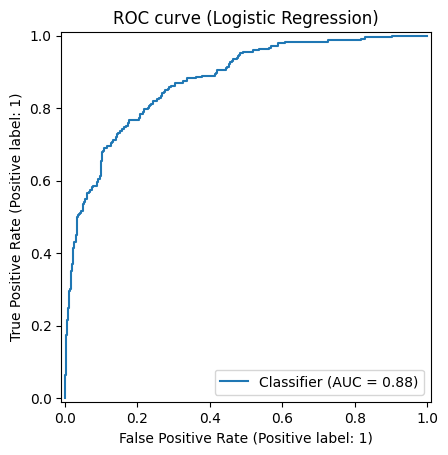

Saved ROC curve to: C:\Users\sveti\PycharmProjects\DPO_II\aie-group\homeworks\HW05\figures\roc_curve.png


In [16]:

# --- 1) Pipeline ---
def make_pipe(C: float) -> Pipeline:
    return Pipeline([
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(C=C, max_iter=2000, solver="lbfgs"))
    ])

# --- 2) Подбор C простым перебором (по валидации на train) ---
C_grid = [0.01, 0.1, 1.0, 10.0, 100.0]

# чтобы честно подобрать C, делаем внутри train еще один split на train/val
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train,
    test_size=0.25,
    random_state=42,
    stratify=y_train
)

best_C = None
best_val_roc = -1.0
results = []

for C in C_grid:
    pipe = make_pipe(C)
    pipe.fit(X_tr, y_tr)

    val_proba = pipe.predict_proba(X_val)[:, 1]
    val_roc = roc_auc_score(y_val, val_proba)

    results.append((C, val_roc))
    if val_roc > best_val_roc:
        best_val_roc = val_roc
        best_C = C

print("Validation ROC-AUC by C:")
for C, val_roc in results:
    print(f"  C={C:<6} -> ROC-AUC={val_roc:.4f}")

print(f"\nBest C: {best_C} (val ROC-AUC={best_val_roc:.4f})")

# --- 3) Обучаем лучшую модель на ВСЁМ train и оцениваем на test ---
best_model = make_pipe(best_C)
best_model.fit(X_train, y_train)

y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_test_pred)
roc = roc_auc_score(y_test, y_test_proba)
prec = precision_score(y_test, y_test_pred, zero_division=0)
rec = recall_score(y_test, y_test_pred, zero_division=0)
f1 = f1_score(y_test, y_test_pred, zero_division=0)
cm = confusion_matrix(y_test, y_test_pred)

print("\nLogReg test metrics:")
print(f"Accuracy : {acc:.4f}")
print(f"ROC-AUC  : {roc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1       : {f1:.4f}")
print("\nConfusion matrix:\n", cm)

# --- 4) ROC-кривая ---
RocCurveDisplay.from_predictions(y_test, y_test_proba)
plt.title("ROC curve (Logistic Regression)")

# --- 5) Сохранение графика в homeworks/HW05/figures/ ---
repo_root = Path.cwd()
for _ in range(6):
    if (repo_root / "homeworks").exists() and (repo_root / "seminars").exists():
        break
    if repo_root.parent == repo_root:
        break
    repo_root = repo_root.parent

fig_dir = repo_root / "homeworks" / "HW05" / "figures"
fig_dir.mkdir(parents=True, exist_ok=True)

out_path = fig_dir / "roc_curve.png"
plt.savefig(out_path, dpi=150, bbox_inches="tight")
plt.show()

print("Saved ROC curve to:", out_path)

In [17]:
results_df = pd.DataFrame([
    {
        "model": "DummyClassifier (most_frequent)",
        "accuracy": 0.5900,
        "roc_auc": 0.5000,
        "precision": None,
        "recall": None,
        "f1": None,
    },
    {
        "model": "LogisticRegression (C=0.01, + StandardScaler)",
        "accuracy": 0.8067,
        "roc_auc": 0.8754,
        "precision": 0.8186,
        "recall": 0.6789,
        "f1": 0.7422,
    },
])

results_df


,model,accuracy,roc_auc,precision,recall,f1
0,DummyClassifier (most_frequent),0.5900,0.5000,NaN,NaN,NaN
1,"LogisticRegression (C=0.01, + StandardScaler)",0.8067,0.8754,0.8186,0.6789,0.7422


Бейзлайн DummyClassifier со стратегией most_frequent всегда предсказывает самый частый класс (default=0). Поэтому его accuracy примерно равна доле нулевого класса (0.59), а ROC-AUC получается 0.50, то есть модель не отличает дефолт от недефолта лучше случайного угадывания. Логистическая регрессия со стандартизацией признаков существенно улучшает качество: на тестовой выборке accuracy выросла до 0.807 (рост примерно на +0.217), а ROC-AUC — до 0.875 (рост примерно на +0.375). Это означает, что модель действительно научилась использовать признаки и хорошо ранжирует клиентов по риску дефолта.

При подборе регуляризации качество почти не менялось: при C от 0.1 до 100 ROC-AUC на валидации держался около 0.8746, а лучший результат оказался при C=0.01 (0.8751), то есть влияние регуляризации в выбранном диапазоне минимальное. По confusion matrix модель верно предсказала 317 недефолтов и 167 дефолтов, при этом сделала 37 ложных срабатываний и 79 пропусков дефолта. Метрики precision=0.819 и recall=0.679 показывают, что модель достаточно точна, но часть дефолтов всё же пропускает. В целом для этой задачи логистическая регрессия выглядит разумным базовым решением: она проста, интерпретируема и даёт сильный выигрыш по сравнению с бейзлайном.